In [1]:
from pathlib import Path

import numba as nb
import numpy as np
import scipy.stats as stats

from natsort import natsorted

import matplotlib.pyplot as plt


#plt.style.use("mike")
import warnings
warnings.simplefilter("ignore")

warnings.filterwarnings('ignore')


import astropy.units as u

import cmasher as cmr

green = "#33FF86"
purple = "#CE33FF"

%matplotlib widget
from cosmogrb.universe.survey import Survey

import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from zusammen.stan_models.stan_model import get_model
from zusammen import AnalysisBuilder, DataSet
from zusammen.spectral_plot import display_posterior_model_counts

from threeML import update_logging_level

import arviz as av


update_logging_level("FATAL")


from astromodels import Band_Calderone, PointSource, Model


from threeML import JointLikelihood, DataList, display_spectrum_model_counts

from astromodels import Cutoff_powerlaw

import popsynth as ps


[WARNING ] The naima package is not available. Models that depend on it will not be available
[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.
[WARNING ] The ebltable package is not available. Models that depend on it will not be available


In [2]:
survey = Survey.from_file('data/survey.h5')
ab = AnalysisBuilder(survey, use_bb=True)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'data/survey.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
ab.write_yaml("test_proc.yml")

In [2]:
ds = DataSet.from_yaml("test_proc.yml")


In [205]:
ds.to_hdf5_file("sgrb.h5")

In [74]:
ds.to_hdf5_file("sgrb.h5", sig_threshold=40)

shit
shit
shit
shit
shit


In [75]:
ds = DataSet.from_hdf5_file('sgrb.h5')

In [76]:
m = get_model("cpl_simple_chunked")

In [77]:
m.clean_model()

In [78]:
m.build_model()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /Users/jburgess/coding/projects/zusammen/zusammen/stan_models/cpl_simple_chunked


In [79]:
data = ds.to_stan_dict()

n_threads = 3
n_chains = 2

fit = m.model.sample(
    
       data=data,
    parallel_chains=n_chains,
    chains=n_chains,
    #inits= {'alpha':-1.},
    threads_per_chain=n_threads,
    seed=1234,
    iter_warmup=1000,
    iter_sampling=500,
    max_treedepth=12,
    show_progress=True,)
    
    

INFO:cmdstanpy:sampling: ['/Users/jburgess/coding/projects/zusammen/zusammen/stan_models/cpl_simple_chunked', 'id=1', 'random', 'seed=1234', 'data', 'file=/var/folders/_0/x_8bb4nj2g1fwkn77r2wv5_40000gn/T/tmpk18149og/6krsz1jd.json', 'output', 'file=/var/folders/_0/x_8bb4nj2g1fwkn77r2wv5_40000gn/T/tmpk18149og/cpl_simple_chunked-20211114204319-1-mnnao1v6.csv', 'method=sample', 'num_samples=500', 'num_warmup=1000', 'algorithm=hmc', 'engine=nuts', 'max_depth=12', 'adapt', 'engaged=1']


chain 2 |          | 00:00 Status

chain 1 |          | 00:00 Status

INFO:cmdstanpy:sampling completed


In [41]:
 m.model.sample?

Signature:
m.model.sample(
    data: Union[Mapping[str, Any], str, NoneType] = None,
    chains: Union[int, NoneType] = None,
    parallel_chains: Union[int, NoneType] = None,
    threads_per_chain: Union[int, NoneType] = None,
    seed: Union[int, List[int], NoneType] = None,
    chain_ids: Union[int, List[int], NoneType] = None,
    inits: Union[Dict[str, float], float, str, List[str], NoneType] = None,
    iter_warmup: Union[int, NoneType] = None,
    iter_sampling: Union[int, NoneType] = None,
    save_warmup: bool = False,
    thin: Union[int, NoneType] = None,
    max_treedepth: Union[int, NoneType] = None,
    metric: Union[str, Dict[str, Any], List[str], List[Dict[str, Any]], NoneType] = None,
    step_size: Union[float, List[float], NoneType] = None,
    adapt_engaged: bool = True,
    adapt_delta: Union[float, NoneType] = None,
    adapt_init_phase: Union[int, NoneType] = None,
    adapt_metric_window: Union[int, NoneType] = None,
    adapt_step_size: Union[int, NoneType] = N

In [80]:
res = av.from_cmdstanpy(fit)

In [81]:
res.sample_stats.treedepth.max()

<xarray.DataArray 'treedepth' ()>
array(12)

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'log_ec'}>,
        <AxesSubplot:title={'center':'log_ec'}>],
       [<AxesSubplot:title={'center':'log_energy_flux_mu_raw'}>,
        <AxesSubplot:title={'center':'log_energy_flux_mu_raw'}>],
       [<AxesSubplot:title={'center':'log_energy_flux_sigma'}>,
        <AxesSubplot:title={'center':'log_energy_flux_sigma'}>],
       [<AxesSubplot:title={'center':'log_energy_flux_raw'}>,
        <AxesSubplot:title={'center':'log_energy_flux_raw'}>],
       [<AxesSubplot:title={'center':'ec'}>,
        <AxesSubplot:title={'center':'ec'}>],
       [<AxesSubplot:title={'center':'log_energy_flux'}>,
        <AxesSubplot:title={'center':'log_energy_flux'}>],
       [<AxesSubplot:title={'center':'log_energy_flux_mu'}>,
        <AxesSubplot:title={'center':'log_energy_flux_mu'}>],
       [<AxesSubplot:title={'center':'energy_flux'}>,
        <AxesSubplot:title={'cente

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
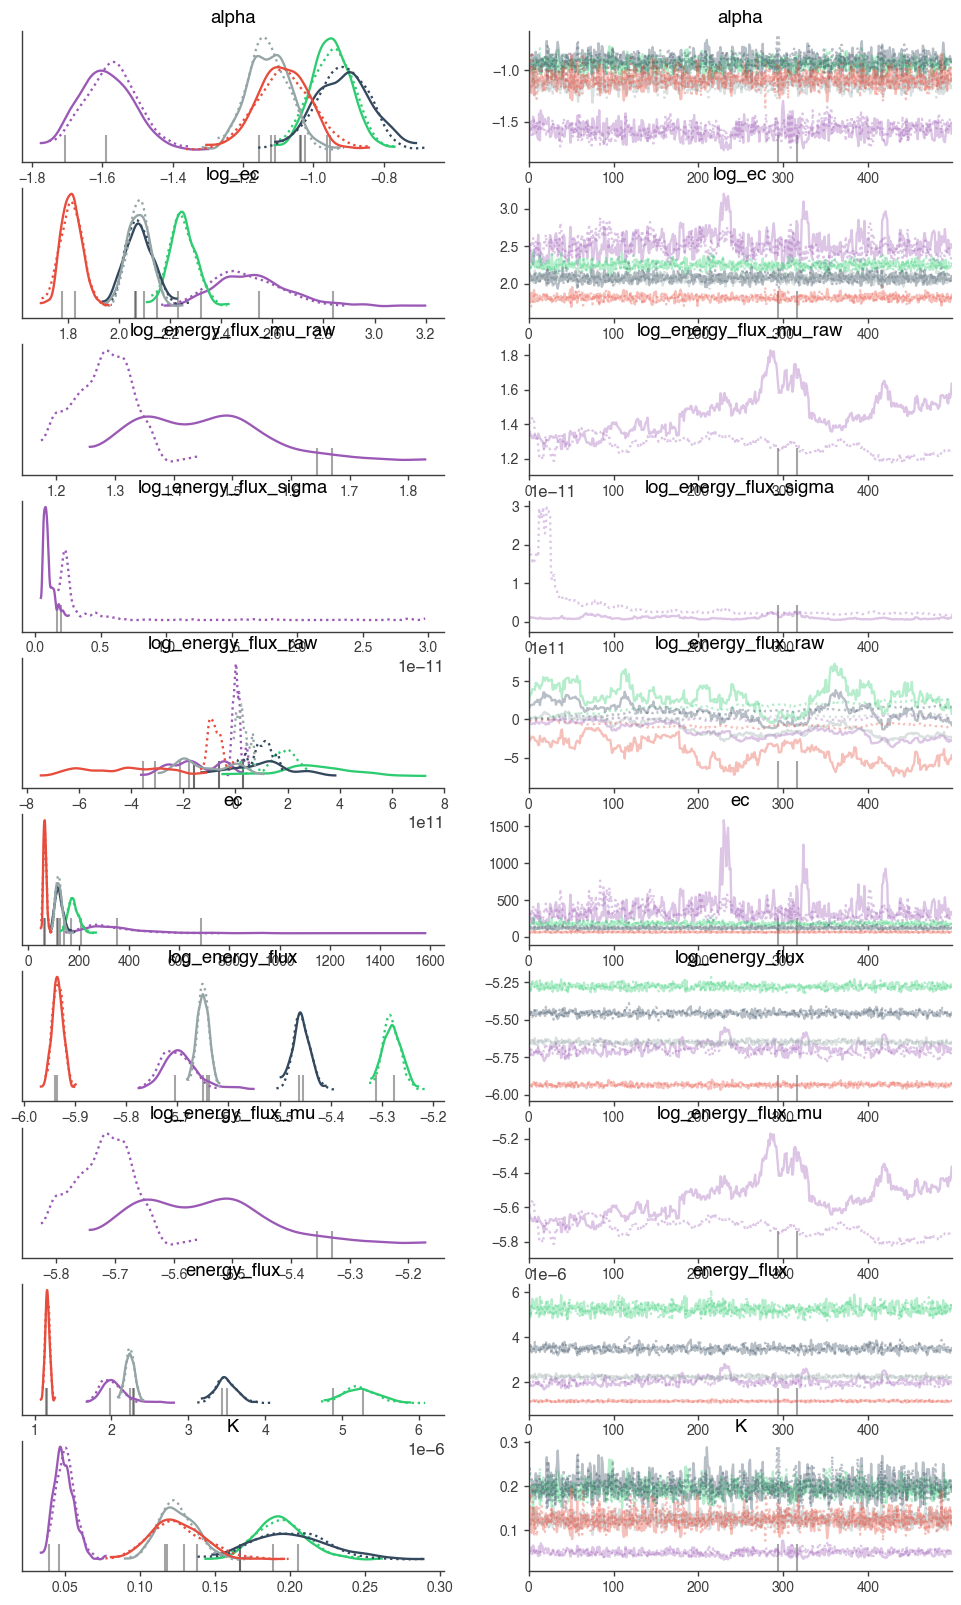

In [82]:
av.plot_trace(res)

In [53]:
bc = Band_Calderone(opt=0, a =10, b=1e4)
bc.beta.fix = True

In [54]:
id = 0

In [83]:
alpha = res.posterior.alpha.stack(sample=("chain", "draw")).values[id]

ep = res.posterior.log_ec.stack(sample=("chain", "draw")).values[id]

K  = res.posterior.K.stack(sample=("chain", "draw")).values[id]


div = res.sample_stats.diverging.stack(sample=("chain", "draw")).values

samples = np.vstack((K, alpha, 10.**ep))


dl = ds.get_data_list_of_interval(id)

In [84]:
div.sum()

2

In [85]:
# bc = Band_Calderone(a=10.,b=1e4,opt=0)

# bc.beta.fix=True

bc = Cutoff_powerlaw(piv=100)

bc.index.bounds = (None, None)
bc.K.bounds = (None, None)
bc.xc.bounds = (None, None)

model = Model(PointSource("ps",0,0, spectral_shape=bc))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
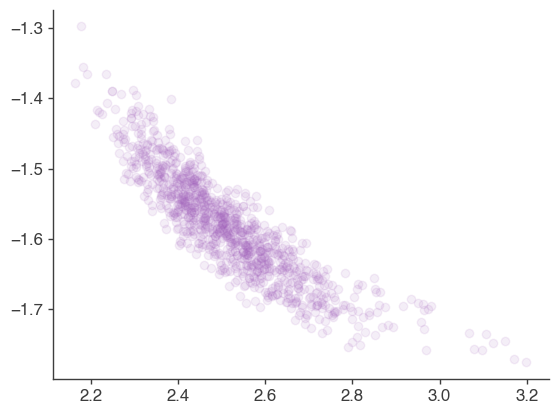

In [86]:
fig, ax = plt.subplots()


ax.scatter(ep, alpha, alpha=0.1)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
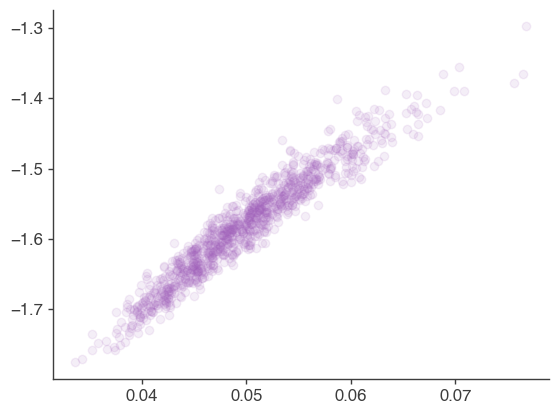

In [87]:
fig, ax = plt.subplots()


ax.scatter(K, alpha, alpha=0.1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
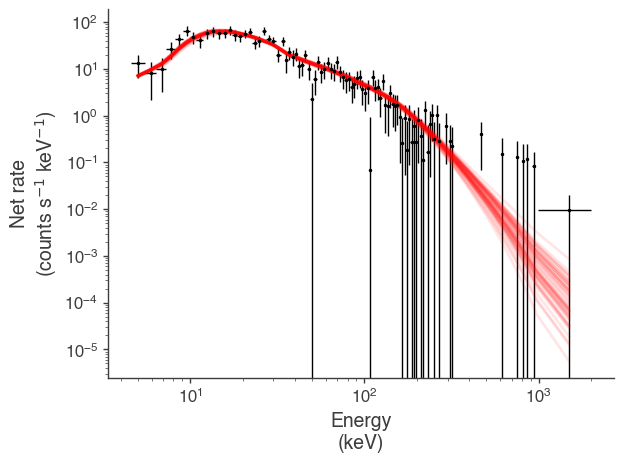

In [88]:
display_posterior_model_counts(dl[1],
                               model, 
                               samples.T[::20], 
                               min_rate=1e-99,
                               shade=False
                              
                              );

In [201]:
cpl = Cutoff_powerlaw(piv=100,K=1e-1,xc=200)






dl = ds.get_data_list_of_interval(2)


model = Model(PointSource("ps",0,0, spectral_shape=cpl))


ba = JointLikelihood(model,DataList(*dl))

In [202]:
ba.fit();

Best fit values:



result  \
parameter                                                            
ps.spectrum.main.Cutoff_powerlaw.K      (2.29 -0.12 +0.13) x 10^-2   
ps.spectrum.main.Cutoff_powerlaw.index              -1.92 +/- 0.04   
ps.spectrum.main.Cutoff_powerlaw.xc         (0.7 -0.5 +2.6) x 10^4   

                                                   unit  
parameter                                                
ps.spectrum.main.Cutoff_powerlaw.K      1 / (cm2 keV s)  
ps.spectrum.main.Cutoff_powerlaw.index                   
ps.spectrum.main.Cutoff_powerlaw.xc                 keV


Correlation matrix:



1.00  0.88 -0.73
 0.88  1.00 -0.66
-0.73 -0.66  1.00


Values of -log(likelihood) at the minimum:



-log(likelihood)
b1           -28.217554
n0            67.683643
n1            78.156550
n5            65.671877
total        183.294516


Values of statistical measures:



statistical measures
AIC            372.636275
BIC            385.304005

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
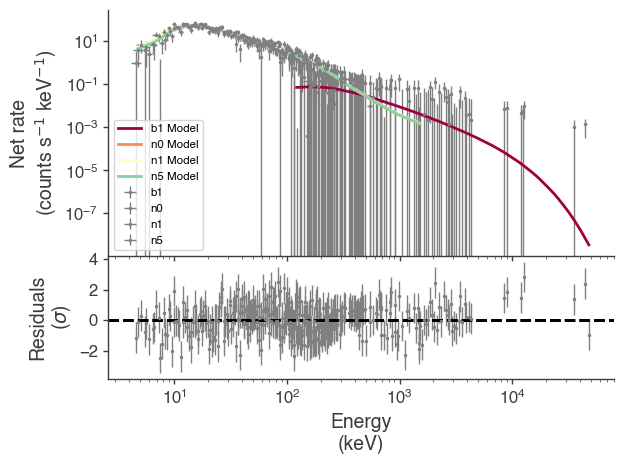

In [200]:
display_spectrum_model_counts(ba);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
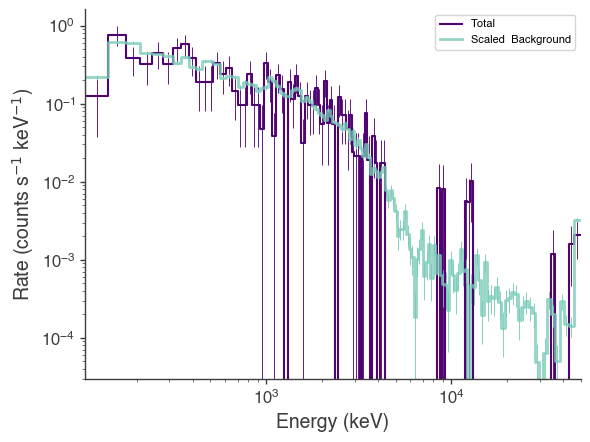

In [191]:
dl[0].view_count_spectrum();

In [24]:
cpl

* description: A power law multiplied by an exponential cutoff
  * formula: $ K~\frac{x}{piv}^{index}~\exp{-x/xc} $
  * parameters:
    * K:
      * value: 1.0
      * desc: Normalization (differential flux at the pivot value)
      * min_value: 1.0e-30
      * max_value: 1000.0
      * unit: ''
      * is_normalization: true
      * delta: 0.1
      * free: true
    * piv:
      * value: 100.0
      * desc: Pivot value
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: false
    * index:
      * value: -2.0
      * desc: Photon index
      * min_value: -10.0
      * max_value: 10.0
      * unit: ''
      * is_normalization: false
      * delta: 0.2
      * free: true
    * xc:
      * value: 10.0
      * desc: Cutoff energy
      * min_value: 1.0
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 1.0
      * free: true